In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
assets = ['GOOG', 'MSFT']
pf_data = pd.DataFrame()

for a in assests:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start = '2010-1-1')['Adj Close']

In [11]:
pf_data.tail()

,GOOG,MSFT
Date,,
2019-07-24,1137.810059,140.720001
2019-07-25,1132.119995,140.190002
2019-07-26,1250.410034,141.339996
2019-07-29,1239.410034,141.029999
2019-07-30,1226.250000,140.294998


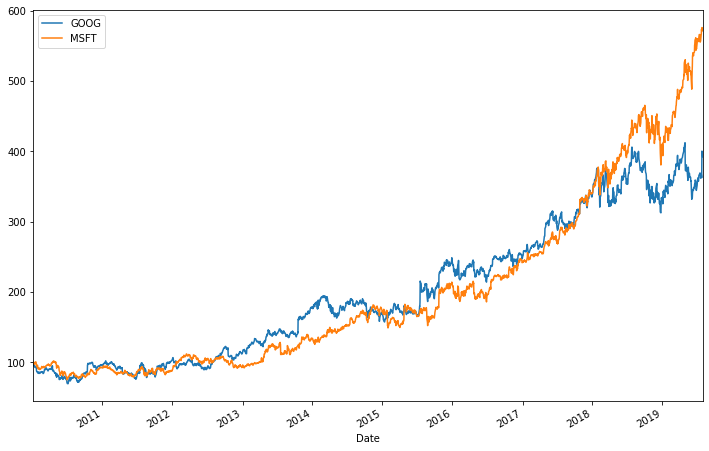

In [12]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(12,8))

In [13]:
# generate log returns
log_returns = np.log(pf_data / pf_data.shift(1))

In [14]:
log_returns.mean() * 250

GOOG    0.142032
MSFT    0.181069
dtype: float64

In [15]:
log_returns.cov() * 250

,GOOG,MSFT
GOOG,0.059767,0.029927
MSFT,0.029927,0.051893


In [16]:
log_returns.corr()

,GOOG,MSFT
GOOG,1.000000,0.537375
MSFT,0.537375,1.000000


In [22]:
num_assets = len(assets)

In [23]:
num_assets

2

In [24]:
arr = np.random.random(2)
arr

array([0.29002143, 0.36254615])

In [25]:
arr[0] + arr[1]

0.6525675820527966

In [26]:
# goal is the two arr sum to equal 2 
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.53079882, 0.46920118])

In [27]:
weights[0] + weights[1]

1.0

Expected Portfolio Returns:

In [29]:
# 250 is the trading days average 
np.sum(weights * log_returns.mean()) * 250

0.16034830568514383

Expected Portfolio Variance:

In [30]:
np.dot(weights.T, np.dot(log_returns.cov()* 250, weights))

0.043170321202583614

Expected Protfolio Volatility

In [31]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.2077746885512853

In [32]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250,weights))))
    
pfolio_returns, pfolio_volatilities

([0.15294870613617811,
  0.1609434807331122,
  0.16139418556931345,
  0.1564028601129294,
  0.15905382209795393,
  0.15495112560894705,
  0.17078903650507496,
  0.1618668866059687,
  0.1562130129014349,
  0.1732326054853613,
  0.16107699159983666,
  0.17951436373399468,
  0.1731811565067904,
  0.152418138002292,
  0.15497117519380949,
  0.15716813991890302,
  0.1732492749275576,
  0.16081517561436812,
  0.16927409016048894,
  0.15462773162831936,
  0.17095996492935023,
  0.16172851327964766,
  0.15812206329886372,
  0.17488426206660126,
  0.15786920383583292,
  0.16205694702151802,
  0.16135273645509968,
  0.15320049052522305,
  0.1726818536730792,
  0.15368264727295392,
  0.1506327951065552,
  0.16975052397401497,
  0.16539477296160884,
  0.16136347224694417,
  0.14937052727755376,
  0.16588102809483685,
  0.17469897991243105,
  0.14674128134159486,
  0.17695010495374366,
  0.17152002641644043,
  0.1664597335021809,
  0.15877047255168616,
  0.15903054808493094,
  0.179417185777479,
  

In [33]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250,weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.15294871, 0.16094348, 0.16139419, ..., 0.14536229, 0.16656028,
        0.16779965]),
 array([0.21709267, 0.20739736, 0.20714984, ..., 0.23463434, 0.20669172,
        0.20723388]))

In [34]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [35]:
portfolios.head()

,Return,Volatility
0,0.152949,0.217093
1,0.160943,0.207397
2,0.161394,0.207150
3,0.156403,0.211702
4,0.159054,0.208792


In [36]:
portfolios.tail()

,Return,Volatility
1995,0.170709,0.209482
1996,0.161250,0.207225
1997,0.145362,0.234634
1998,0.166560,0.206692
1999,0.167800,0.207234


Text(0, 0.5, 'Expected Return')

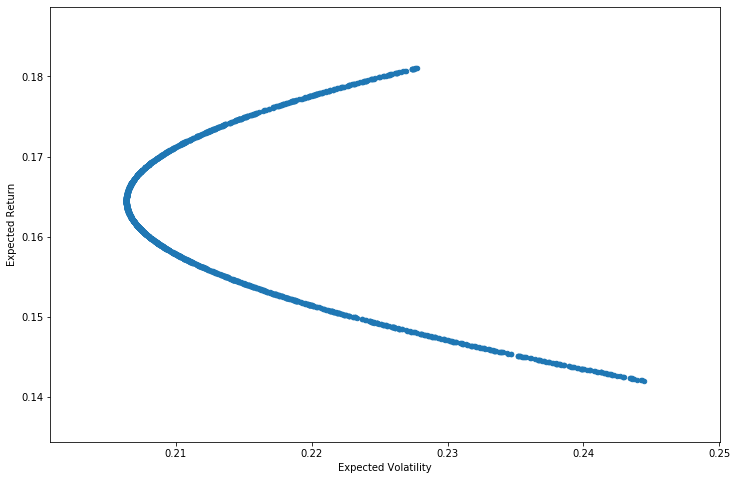

In [37]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(12,8));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')